In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import model_from_json
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

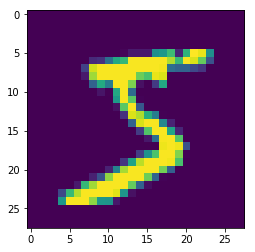

In [3]:
%matplotlib inline
##display(X_train[0])
plt.imshow(X_train[0])
##plt.show(X_train[0])
##X_train[0]


In [4]:
##thano
##X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
##X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
##tensorflow
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train.shape

(60000,)

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [8]:
# 7. Define model architecture
model = Sequential()
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# 8. Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=[coeff_determination, 'mse', 'mae', 'mape', 'acc'])

Epoch 1/2
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2102 - coeff_determination: 0.8932 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 10221701.8755 - acc: 0.9355
Epoch 2/2
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0882 - coeff_determination: 0.9552 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 4194387.6502 - acc: 0.9742


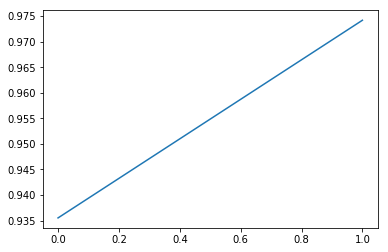

In [10]:
# 9. Fit model on training data
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
history = model.fit(X_train, Y_train, batch_size=32, epochs=2, verbose=1)
# plot metrics
plt.plot(history.history['acc'])
plt.show()

In [11]:
# 10. Evaluate model on test data
#loss/accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.039045914207084573,
 0.97793255882263186,
 0.0019860711884796415,
 0.003950634320979589,
 1975317.6096929687,
 0.98650000000000004]

In [12]:
predictions = model.predict(X_test)
predictions[0]

array([  2.12820006e-09,   9.86598914e-10,   4.56491222e-07,
         3.19518477e-07,   3.26013549e-10,   3.04969078e-10,
         4.80778476e-14,   9.99995947e-01,   1.13580718e-08,
         3.17889840e-06], dtype=float32)

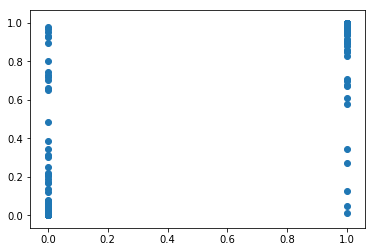

In [13]:
import matplotlib.pyplot as plt
Y_test_hat = model.predict(X_test)
# Plot predictions for first value (the second value is the same, but changing the 0 by1)
plt.scatter(Y_test[:,0], Y_test_hat[:,0])
plt.show()

In [14]:
#SAVE THE MODEL FOR REUSE
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [15]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
type(loaded_model)

keras.models.Sequential